# Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

## Instruction to Use
1. load data from Github. 
2. run `main`

## Input 

1. .csv - produced by `pre_processing.ipynb`
2. The pre_processed input data includes following techniques:
   * MinMax Scaling
   * PCA
   * Correlation

## Output
* Visualization of the DTs
    * `images/decisionTree_wo_prep.png`
    * `images/decisionTree_minmax.png`
    * `images/decisionTree_minmax_corr.png`
    * `images/decisionTree_pca.png`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import matplotlib.image as mpimg
import subprocess

In [2]:
def main(network_data, title):
    y = network_data['label']
    x = network_data.drop(['label'],axis=1)
    if 'attack_cat' in list(x):
        x = x.drop(['attack_cat'],axis=1)
    column_list = list(x)
    print("Shape of x: ", x.shape)
    print("Shape of y: ", y.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    
    model = DecisionTreeClassifier(criterion='gini' ,max_depth=3, random_state = 0)
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    print(classification_report(y_test,predictions))
    print('Decision Tree model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, predictions)))
    
    dot = ".dot"
    png = ".png"
    path = "images/decisionTree_"
    
    dotFile = path + title + dot
    pngFile = path + title + png
    
    export_graphviz(model, out_file = dotFile, feature_names=column_list )
    
    
    subprocess.run(["dot", "-Tpng", dotFile, "-o", pngFile])
    img = mpimg.imread(pngFile)
    plt.imshow(img)
    plt.show()

We also drop 'attack_cat' because there is only one encoded digit for non-attack category.
## Classification without Preprocessing

Shape of x:  (257673, 42)
Shape of y:  (257673,)
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     27823
           1       0.94      0.89      0.91     49479

    accuracy                           0.89     77302
   macro avg       0.88      0.89      0.89     77302
weighted avg       0.90      0.89      0.89     77302

Decision Tree model accuracy score: 0.8918


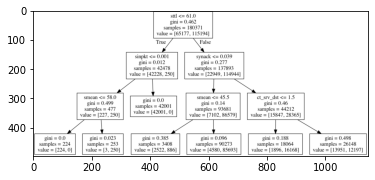

In [3]:
network_data = pd.read_csv('https://raw.githubusercontent.com/divyaKh/CMPE255Project/main/2.Data_Cleaning/cleaned_dataset_label_encoding.csv')
main(network_data, "wo_prep")

## Classification with RF after MinMax Scaling 

Shape of x:  (257673, 42)
Shape of y:  (257673,)
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     27912
           1       0.94      0.89      0.91     49390

    accuracy                           0.89     77302
   macro avg       0.88      0.89      0.89     77302
weighted avg       0.90      0.89      0.89     77302

Decision Tree model accuracy score: 0.8917


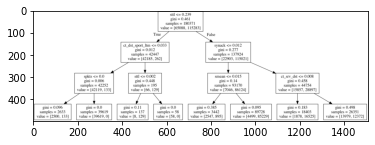

In [4]:
network_data = pd.read_csv('../../4.Preprocessing/output/dataset_minmax.csv')
main(network_data, "minmax")

## Classification with RF after Dimension Reduction (using PCA)

Shape of x:  (257673, 29)
Shape of y:  (257673,)
              precision    recall  f1-score   support

           0       0.91      0.70      0.79     27972
           1       0.85      0.96      0.90     49330

    accuracy                           0.87     77302
   macro avg       0.88      0.83      0.85     77302
weighted avg       0.87      0.87      0.86     77302

Decision Tree model accuracy score: 0.8671


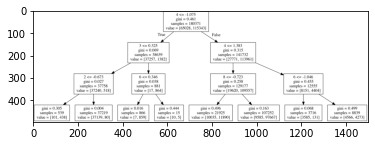

In [5]:
network_data = pd.read_csv('../../4.Preprocessing/output/dataset_pca.csv')
main(network_data, "pca")

## Classification with RF after MinMax Scaling + Correlation analysis

Shape of x:  (257673, 33)
Shape of y:  (257673,)
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     27888
           1       0.85      0.99      0.91     49414

    accuracy                           0.88     77302
   macro avg       0.91      0.84      0.86     77302
weighted avg       0.89      0.88      0.88     77302

Decision Tree model accuracy score: 0.8809


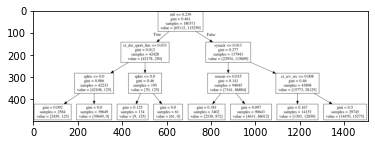

In [6]:
network_data = pd.read_csv('../../4.Preprocessing/output/dataset_minmax_corr.csv')
main(network_data, "minmax_corr")